In [68]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
def check(p): pass
check(0)

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

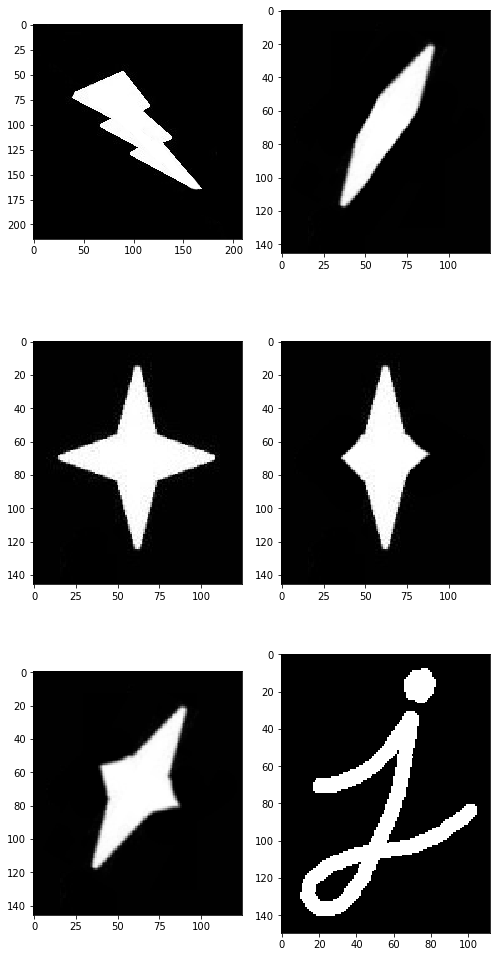

In [84]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [39]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [22]:
# TODO
# Your Answer

#I thought the value would be close to 20, but the actual value was 75 which I believe represents how many unique intensity values there are


## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


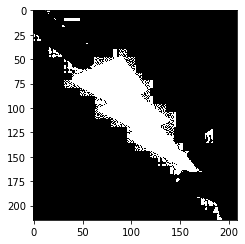

In [42]:
_, lightningbolt = cv2.threshold(lightningbolt,0,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [44]:
## TODO
## Your answer

# anything that is completely white is left as white, but everything else, is changed to black, so the gradient from white to black
# is removed and the gray pixels are changed to black

# A "good" value for thresholding would be in the middle of 0 and 255 so that the generally white pixels are still made white
# and the generally black pixels are left as black making a clean image

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

(215, 209) (146, 125)
(215, 209) (215, 209)


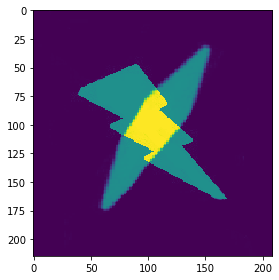

In [87]:
# 1. Blend
# TODO
print(lightningbolt.shape, blob.shape)
blob_resized = cv2.resize(blob, (209, 215), interpolation=cv2.INTER_NEAREST)
print(lightningbolt.shape, blob_resized.shape)

blend = cv2.addWeighted(lightningbolt, 0.5, blob_resized, 0.5, 0)
plt.imshow(blend)

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

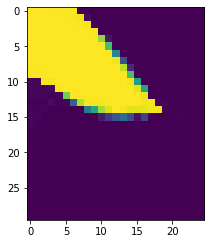

In [62]:
# 2. ROI
# TODO
tip = plt.imshow(lightningbolt[150:180,150:175])

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

(150, 112)
(150, 112)


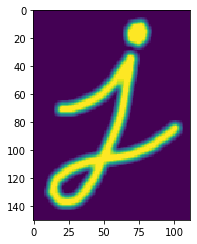

In [67]:
# 3. 
# TODO

kernel = np.ones((5,5), np.float32)/25
avg = cv2.filter2D(letterj, -1, kernel)
plt.imshow(avg)

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

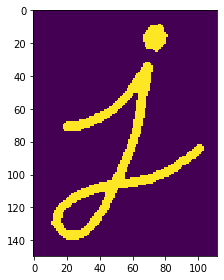

In [73]:
# 4
# TODO
kernel = np.ones((3,3), np.uint8)
erosion_j = cv2.erode(letterj, kernel, iterations = 1)
plt.imshow(erosion_j)

## 5. Perform erosion on j with a 5x5 kernel

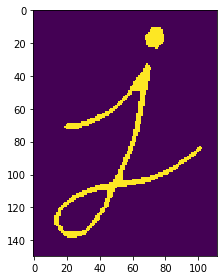

In [71]:
# 5
# TODO

kernel = np.ones((5,5), np.uint8)
erosion_j = cv2.erode(letterj, kernel, iterations = 1)
plt.imshow(erosion_j)

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



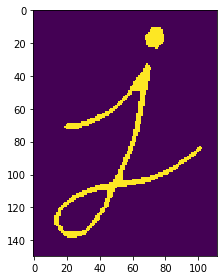

In [74]:
# 6
# TODO

kernel = np.ones((3,3), np.uint8)
erosion_j = cv2.erode(letterj, kernel, iterations = 2)
plt.imshow(erosion_j)

## 7. Perform dilation on j with a 3x3 kernel

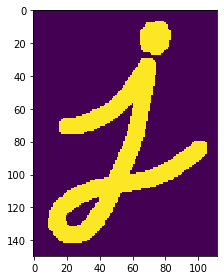

In [79]:
# 7
# TODO

kernel = np.ones((3,3), np.uint8)
dilate_j = cv2.dilate(letterj, kernel, iterations = 1)
plt.imshow(dilate_j)

## 8. Perform dilation on j with a 5x5 kernel

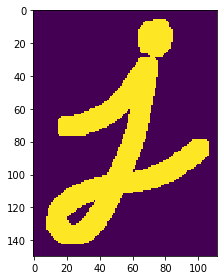

In [80]:
# 8
# TODO

kernel = np.ones((5,5), np.uint8)
dilate_j = cv2.dilate(letterj, kernel, iterations = 1)
plt.imshow(dilate_j)

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# 9
# TODO

# the bigger the kernel size, the more it affects the image per iteration since it checks more pixels per operation

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# 10
# TODO

# having more iterations repeats the process many times, and may produce a result with less differences than the original image (excluding morphing)
# due to it changing a small amount at a time, but with a bigger kernel, a less smooth image may appear

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

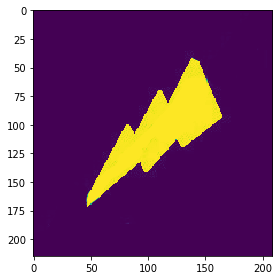

In [83]:
# 11
# TODO

rows, cols = lightningbolt.shape
M = cv2.getRotationMatrix2D((cols//2, rows//2), -90, 1)
img_rot = cv2.warpAffine(lightningbolt, M, (cols, rows))
plt.imshow(img_rot)

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

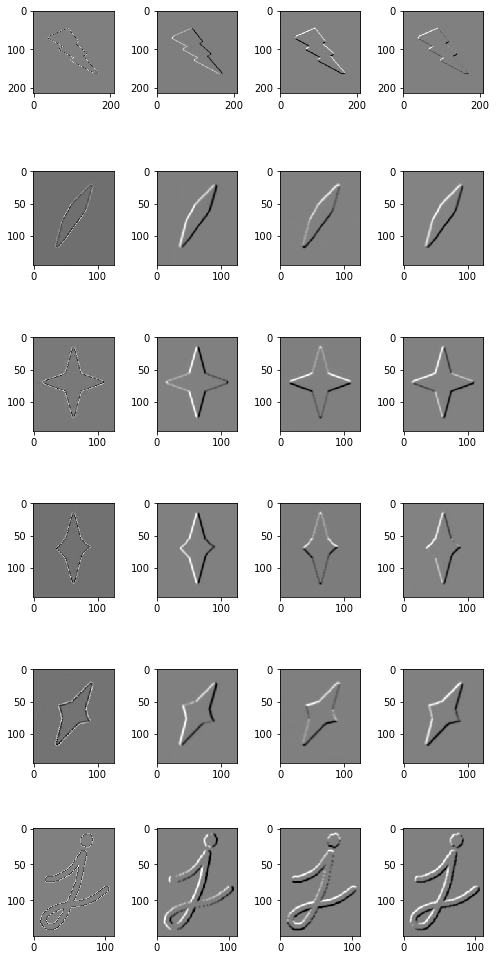

In [94]:
lst = []
for img in images:
    laplacian = cv2.Laplacian(img, cv2.CV_64F)    
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    
    # a better way than using exercise 1 is to just simply add the image arrays
    # so that we can combine more than 2 images at once
    combined = laplacian*0.33 + sobelx*0.33 + sobely*0.33
    
    lst.append(laplacian)
    lst.append(sobelx)
    lst.append(sobely)
    lst.append(combined)


fig,ax = plt.subplots(nrows=6, ncols=4)
for a,i in zip(ax.flatten(), lst):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 